In [2]:
library(tidyverse)
library(glmnet)
library(reticulate)
source(file.path('rconfig.R'))

In [3]:
use_python(python = PYTHON_EXE_FOR_RETICULATE, required=TRUE)
source_python(file.path(HOME_DIRECTORY, 'vic-ia', 'code', 'get_model_data.py'))

In [4]:
fit_adaptive_lasso = function(X_df, y_vec){
  X_df = scale(X_df)
  mod_glm = glm(y_vec ~ X_df, family=binomial(link='logit'))
  alasso_weights = 1/abs(mod_glm$coefficients[-1])
  mod_al = glmnet(scale(X_df),
                        y_vec,
                        family=binomial(link='logit'),
                        penalty.factor=alasso_weights,
                        standardize=FALSE
                  )
  bic = deviance(mod_al) + log(nrow(X_df))*mod_al$df
  plot(bic)
  best_lambda = mod_al$lambda[which.min(bic)]
  mod_al_best = glmnet(X_df,
                       y_vec,
                       family=binomial(link='logit'),
                       penalty.factor=alasso_weights,
                       standardize=FALSE,
                       lambda = best_lambda)
  coeff_best = mod_al_best$beta
  selected_vars = coeff_best@Dimnames[[1]][coeff_best@i + 1]
  return(selected_vars)
}

[1] "T_SFC"                  "T_SFC_ishistorical"     "RH_SFC"                
 [4] "WindMagKmh_SFC"         "KBDI"                   "ruggedness_average_3km"
 [7] "building_density_3km"   "road_density_km_in_3km" "road_distance_m"       
[10] "forest_density_3km"     "shrub_density_3km"      "Curing"

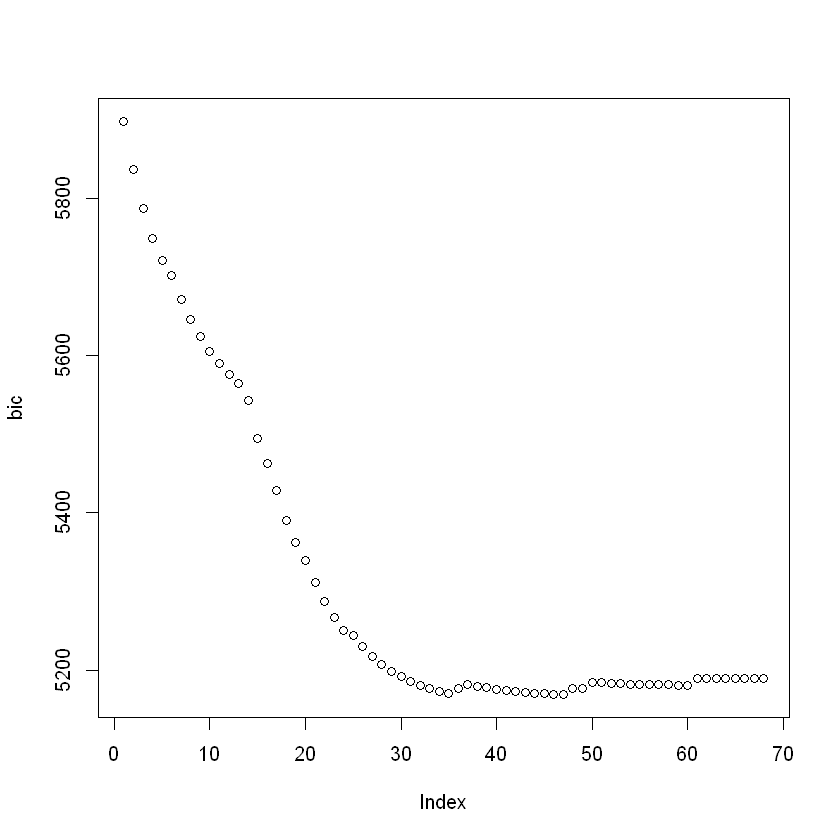

In [5]:
fit_adaptive_lasso(grass_incidents[grass_features], grass_incidents$uncontrolled_within_2_hrs)

[1] "T_SFC"                  "DF_SFC"                 "WindMagKmh_SFC"        
 [4] "ruggedness_average_3km" "building_density_20km"  "road_density_km_in_3km"
 [7] "road_distance_m"        "shrub_density_3km"      "noveg_density_3km"     
[10] "distance_to_interface"  "Curing"

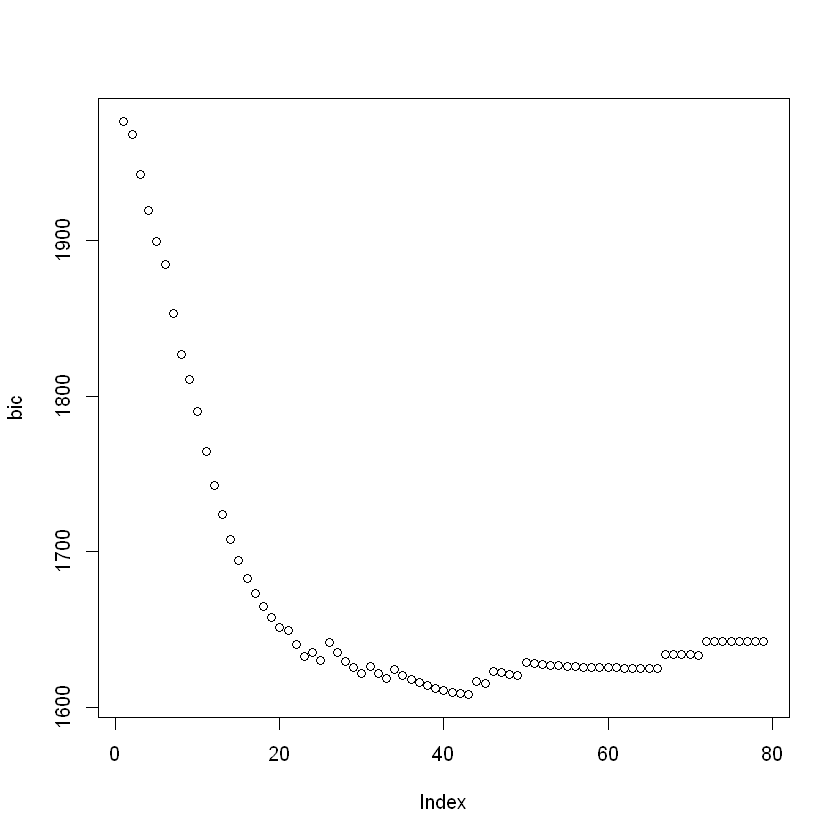

In [17]:
fit_adaptive_lasso(grass_incidents[grass_features], grass_incidents$uncontrolled_within_100_ha)

[1] "T_SFC"                  "RH_SFC"                 "DF_SFC"                
 [4] "elevation_m"            "road_density_km_in_3km" "road_distance_m"       
 [7] "grass_density_3km"      "shrub_density_3km"      "noveg_density_3km"     
[10] "distance_to_interface"

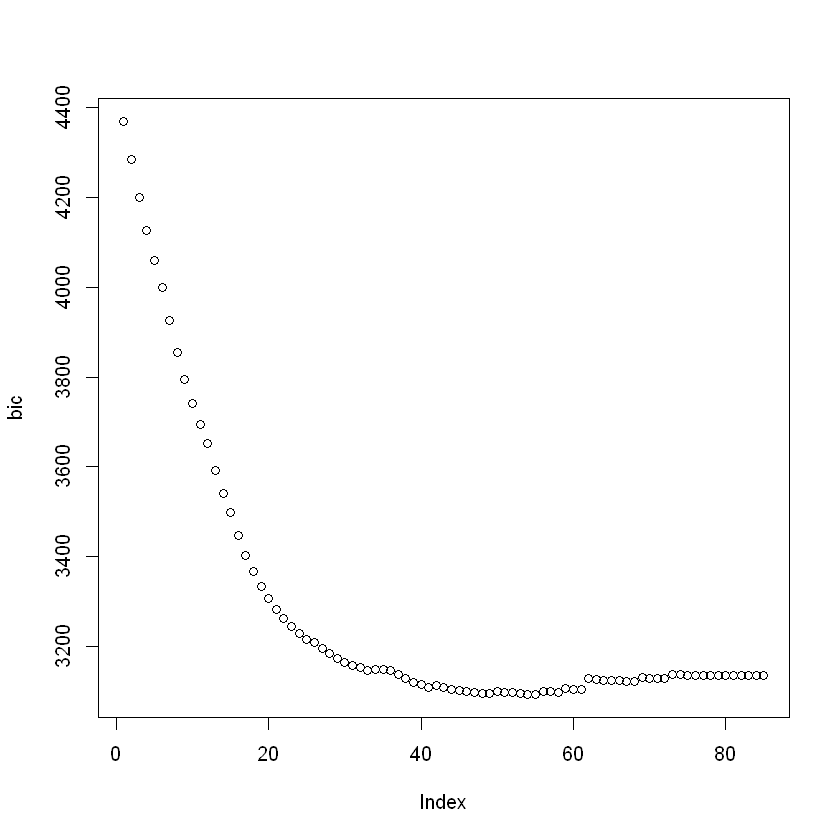

In [20]:
fit_adaptive_lasso(forest_incidents[forest_features], forest_incidents$uncontrolled_within_4_hrs)

[1] "T_SFC"                  "RH_SFC"                 "DF_SFC"                
 [4] "WindMagKmh_SFC"         "road_density_km_in_3km" "road_distance_m"       
 [7] "grass_density_3km"      "noveg_density_3km"      "distance_to_interface" 
[10] "soil_moisture"

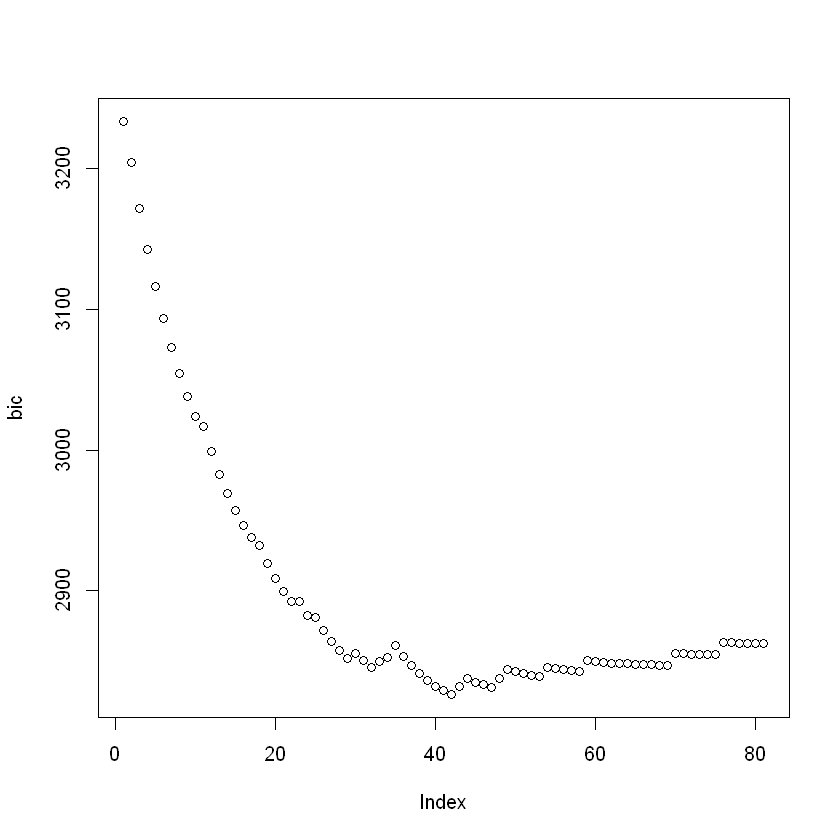

In [19]:
fit_adaptive_lasso(forest_incidents[forest_features], forest_incidents$uncontrolled_within_5_ha)

The variables selected for each model in this code have been manually entered into the `logistic_regression` notebook.